In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [36]:
class Point:
    def __init__(self, df):
        self.df = df

    def create_feed_line(self, q, xf):
        if q == 1:
            raise Exception('Not implemented yet') #To do list
        return lambda x: q*x/(q-1) - xf/(q-1)


    def find_intersection(self, q, xf, epsilon=1e-5):
        feed = self.create_feed_line(q, xf)
        x_values = self.df['x'].values
        y_values = self.df['y'].values

        def difference_function(x):
            return y_values - feed(x)

        # Verifica el cambio de signo para encontrar intervalos que contienen la intersección
        sign_changes = np.where(np.diff(np.sign(difference_function(x_values))))[0]

        if len(sign_changes) == 0:
            return None 

        intersections = []

        # Utiliza interpolación para encontrar la intersección en cada subintervalo
        for i in sign_changes:
            x_interval = x_values[i:i+2]
            y_interval = y_values[i:i+2]
            interpolator = interp1d(x_interval, y_interval, kind='linear', fill_value="extrapolate")
            intersection = fsolve(lambda x: interpolator(x) - feed(x), np.mean(x_interval))
            intersections.extend(intersection)

        return intersections

    def plot_intersection(self, q_guess, xf_guess):
        intersections = self.find_intersection(q_guess, xf_guess)

       
        x_values = self.df['x'].values
        y_values = self.df['y'].values

        feed = self.create_feed_line(q_guess, xf_guess)
        y_feed = feed(x_values)
        
        print(intersections, feed(np.array(intersections)))

        plt.plot(x_values, y_values, label='Puntos del DataFrame')
        plt.plot(x_values, y_feed, label='Recta create_feed_line')
        plt.scatter(intersections, feed(np.array(intersections)), color='red', label='Intersección')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        
        return (intersections, feed(np.array(intersections)))




In [37]:
df = pd.read_csv('methanol-water.csv')
point_instance = Point(df)
puntos = point_instance.plot_intersection(1, 0.5)

Exception: Not implemented yet

In [26]:
print(puntos)

None


[0.5878571428571427] [0.5]


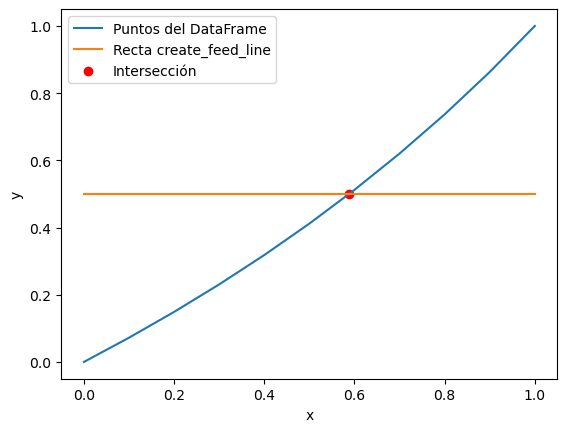

([0.5878571428571427], array([0.5]))

In [38]:
df2 = pd.read_csv('hexane-heptane.csv')
point_instance = Point(df2)
point_instance.plot_intersection(0, 0.5)

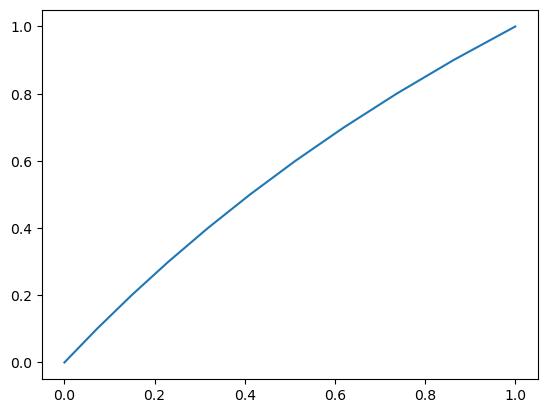

In [41]:
plt.plot(df2['y'], df2['x'])